![](https://raw.githubusercontent.com/knmlprz/poradniki/main/resources/Notebooks.png)

[![](https://badges.aleen42.com/src/github.svg)](https://github.com/knmlprz/)
[![](https://badges.aleen42.com/src/discord.svg)](https://discord.com/invite/ZYJdXXgE6H)
[![](https://badges.aleen42.com/src/telegram.svg)](https://t.me/s/knmlprz)

# Używanie pakietu OWSLib

OWSLib to biblioteka służąca do pobierania danych geoprzestrzennych przez interfejs OWS.
Pełna dokumentacja biblioteki dostępna jest [tutaj](http://geopython.github.io/OWSLib/).

## Zastosowanie dla terenu Polski

Strona Głównego Urzędu Geodezji i Kartografii [udostępnia szereg usług OWS](https://www.geoportal.gov.pl/uslugi/usluga-przegladania-wms). Pobierzmy dane z usługi "Baza danych obiektów topograficznych BDOT10K".

### Informacje wstępne

Kod został przetestowany na następującej konfiguracji:

- Python 3.10.10
- OWSLib 0.24.1
- jupyter 1.0.0

### Zaimportowanie bibliotek

Do użycia OWSLib potrzebne nam będą:

- OWSLib,
- cv2(do załadowania pobranego obrazu),
- matplotlib(do wyświetlenia go).

Uwaga dla użytkowników Condy:

Biblioteka OpenCV, która będzie użyta do załadowania pobranej mapy może nie działać poprawnie jeśli nie zainstaluje się jej poleceniem:
```bash
conda install -c anaconda py-OpenCV
```

In [1]:
%pip install owslib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
from owslib.wcs import WebCoverageService #do obsługi WCS
import cv2
from matplotlib import pyplot as plt

### Przygotowanie handlera OWS

In [4]:
wcs_handler = WebCoverageService('https://mapy.geoportal.gov.pl/wss/service/PZGIK/ORTO/WCS/HighResolution', version='1.0.0')

Możemy zweryfikować dostawcę usługi...

In [5]:
print (wcs_handler.provider.name)

GUGiK


...oraz, co ważniejsze, zdobyć informację o warstwach, jakie oferuje usługa:

In [ ]:
print(wcs_handler.contents.keys())

dict_keys(['Orthoimagery_High_Resolution'])


### Przygotowanie koordynatów krańcowych pobieranego obszaru
Informacje o bounding box(czyli prostokącie zaznaczającym interesujący nas obszar) przekazuje się, podając tylko dwa punkty:

- lewy górny,
- prawy dolny.

Geoportal przyjmuje koordynaty w systemie EPSG:2180; różni się on od GCS(w którym podaje się długość i szereokość geograficzną), więc trzeba zastanowić się nad zdobyciem współrzędnych tyh punktów; my użyjemy z góry ustalonych punktów.

In [6]:
UpperLeft = {
    'x': 244852,
    'y': 715018
}

LowerRight = {
    'x': 243650,
    'y': 716708
}

#kolejność podawania współrzędnych jest z góry ustalona
#aczkolwiek korzystanie ze słowników do podpisywania ich nie jest konieczna ;)

bbox = (UpperLeft['y'], LowerRight['x'], LowerRight['y'], UpperLeft['x'])

#system koordynatów wg. którego podawane są koordynaty wierzchołków zaznaczanego obszaru

crs = "EPSG:2180" 

### Przygotowanie reszty parametrów

Ze względu na możliwą większą ilość warstw, musimy podać tą, która nas interesuje. (podobnie z formatem)

In [7]:
coverage = 'Orthoimagery_High_Resolution' #nazwa warstwy, z której chcemy pobierać dane

format = "GEOTIFF" #format, w jakim chcemy otrzymać dane

### Utworzenie obiektu obsługującego pobieranie mapy

Mając przygotowane wszystkie parametry, możemy utworzyć handler i zacząć pobierać dane.

**Uwaga**: pobieranie może potrwać około 11-20 minut.

In [ ]:
download_handler = wcs_handler.getCoverage(identifier=coverage, bbox=bbox, format=format, crs=crs, resx=0.1, resy=0.1)

In [ ]:
with open("raw_img","wb+") as f: 
  f.write(download_handler.read())

In [ ]:
img_cv = cv2.imread("./raw_img")
img_bgr = cv2.cvtColor(img_cv, cv2.COLOR_RGB2BGR)
cv2.imshow("map" ,img_bgr)

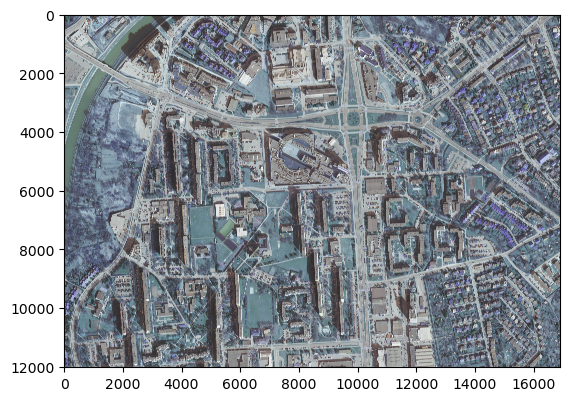

In [ ]:
img_cv = cv2.imread("./raw_img")
plt.imshow(img_cv)